In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

import matplotlib
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        # Lines
        'lines.linewidth': 1,
        'lines.markersize': 4.0,
        'figure.titlesize': 'large',
    
}
matplotlib.rcParams.update(nice_fonts)

In [8]:
data = np.atleast_2d(np.load("data/hJ-L-6-h-1.0-U-3.0-J-4.0-seed-0.npy", allow_pickle=True))[0][0]
evs = data['evals_vs_step']
print("There are %d steps each with %d eigenvalues"%(evs.shape[0], evs.shape[1]))

There are 52 steps each with 64 eigenvalues


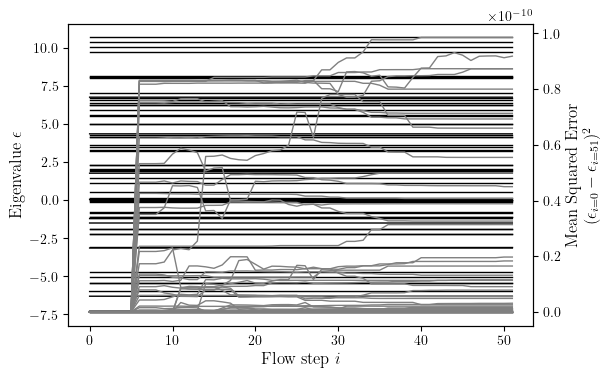

In [9]:
fig, ax = plt.subplots(dpi=100)

mse = []
for i in range(evs.shape[1]):
    ax.plot(np.arange(evs.shape[0]), evs[:,i], c='k')
    mse.append( (evs[0,i] - evs[:,i])**2 )
    
ax.set_xlabel("Flow step $i$")
ax.set_ylabel("Eigenvalue $\epsilon$")

ax2 = ax.twinx()
ax2.set_ylabel("Mean Squared Error\n $(\epsilon_{i=0} - \epsilon_{i=%d})^2$"%(evs.shape[0]-1))
for i in range(evs.shape[1]):
    ax2.plot(np.arange(evs.shape[0]), mse[i], c='gray')